# LENDING LOAN CASE STUDY

### Import libraries

In [476]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 60)

### Reading data

In [477]:
loanDf = pd.read_csv("loan/loan.csv",index_col=0)

C:\Users\asthaagarwal\AppData\Local\Temp\ipykernel_47576\4194240325.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loanDf = pd.read_csv("loan/loan.csv",index_col=0)


In [478]:
print(loanDf.head())

         member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
id                                                                        
1077501    1296599       5000         5000           4975.0   36 months   
1077430    1314167       2500         2500           2500.0   60 months   
1077175    1313524       2400         2400           2400.0   36 months   
1076863    1277178      10000        10000          10000.0   36 months   
1075358    1311748       3000         3000           3000.0   60 months   

        int_rate  installment grade sub_grade                 emp_title  \
id                                                                        
1077501   10.65%       162.87     B        B2                       NaN   
1077430   15.27%        59.83     C        C4                     Ryder   
1077175   15.96%        84.33     C        C5                       NaN   
1076863   13.49%       339.31     C        C1       AIR RESOURCES BOARD   
1075358   12.69%        

In [479]:
loanDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 1077501 to 87023
Columns: 110 entries, member_id to total_il_high_credit_limit
dtypes: float64(74), int64(12), object(24)
memory usage: 33.6+ MB


In [480]:
loanDf.shape

(39717, 110)

In [481]:
loanDf.isna().sum()

member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 110, dtype: int64

As observed, multiple columns have NA is all the records, hence as part of data cleaning we can drop them

## Data Cleaning

Part 1: Drop fields with all NA records

In [482]:
# Dropping fields with all NA values
loanDf=loanDf.dropna(axis=1,how='all')

In [483]:
loanDf.shape

(39717, 56)

Part 2: Drop static fields, for which data is same for all records

In [484]:
# Identify Fields having static data
static_fields = []
for col in loanDf.columns:
    if len(loanDf[col].value_counts()) == 1:
        print(loanDf[col].value_counts())
        static_fields.append(col)

n    39717
Name: pymnt_plan, dtype: int64
f    39717
Name: initial_list_status, dtype: int64
0.0    39661
Name: collections_12_mths_ex_med, dtype: int64
1    39717
Name: policy_code, dtype: int64
INDIVIDUAL    39717
Name: application_type, dtype: int64
0    39717
Name: acc_now_delinq, dtype: int64
0.0    39661
Name: chargeoff_within_12_mths, dtype: int64
0    39717
Name: delinq_amnt, dtype: int64
0.0    39678
Name: tax_liens, dtype: int64


In [485]:
loanDf = loanDf.drop(columns=static_fields)

In [486]:
loanDf.isna().sum().sort_values(ascending=False)

next_pymnt_d               38577
mths_since_last_record     36931
mths_since_last_delinq     25682
desc                       12940
emp_title                   2459
emp_length                  1075
pub_rec_bankruptcies         697
last_pymnt_d                  71
revol_util                    50
title                         11
last_credit_pull_d             2
recoveries                     0
open_acc                       0
pub_rec                        0
revol_bal                      0
total_acc                      0
out_prncp                      0
total_rec_late_fee             0
out_prncp_inv                  0
total_pymnt                    0
total_pymnt_inv                0
last_pymnt_amnt                0
total_rec_int                  0
collection_recovery_fee        0
total_rec_prncp                0
member_id                      0
inq_last_6mths                 0
annual_inc                     0
funded_amnt                    0
funded_amnt_inv                0
term      

In [487]:
loanDf["pub_rec_bankruptcies"].value_counts()

0.0    37339
1.0     1674
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

Part 3: Below fields can be dropped 
1. desc: Loan description (Field is having a lot of Null values and based on its meaning will not contribute in identifying defaulty loan)
2. next_pymnt_d: More than 90% of the records are empty
3. mths_since_last_record : More than 90% of the records are empty 
4. mths_since_last_delinq : Most of the records are empty
5. pub_rec_bankruptcies: Has 697 NA values and most of the values are 0.0, hence we can drop them

In [488]:
drop_col_list = ["desc","pub_rec_bankruptcies","next_pymnt_d","mths_since_last_record","mths_since_last_delinq"]

In [489]:
loanDf = loanDf.drop(columns=drop_col_list)
loanDf.shape

(39717, 42)

### Clean up based on domain knowledge
Part 4: Remove fields not adding valuable meaning to problem statement from domain standpoint
1. Member id
2. emp_title
3. zip_code
4. addr_state
5. url
6. title
7. last_credit_pull_d

Part 5: Remove post approval features (features which will not impact the defaulting nature of borrower)
1. delinq_2yrs
2. revol_bal
3. out_prncp
4. total_pymnt
5. total_pymnt_inv
6. total_rec_prncp
7. total_rec_int
8. total_rec_late_fee
9. recoveries
10. out_prncp_inv
11. collection_recovery_fee
12. earliest_cr_line
13. last_pymnt_amnt

In [490]:
drop_col_list = ["member_id","url","title","last_credit_pull_d","emp_title","zip_code","addr_state", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_pymnt_inv", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries",'out_prncp_inv', 'collection_recovery_fee','earliest_cr_line','last_pymnt_amnt']

In [491]:
loanDf = loanDf.drop(columns=drop_col_list)

In [492]:
loanDf.shape

(39717, 22)

In [493]:
loanDf.corr()

C:\Users\asthaagarwal\AppData\Local\Temp\ipykernel_47576\4225840088.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loanDf.corr()


,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,inq_last_6mths,open_acc,pub_rec,total_acc
loan_amnt,1.000000,0.981578,0.940034,0.930288,0.271149,0.066439,0.009229,0.177168,-0.051236,0.256442
funded_amnt,0.981578,1.000000,0.958422,0.956159,0.266965,0.066283,0.009259,0.175530,-0.052169,0.250589
funded_amnt_inv,0.940034,0.958422,1.000000,0.905039,0.254375,0.074689,-0.005712,0.163027,-0.053214,0.242854
installment,0.930288,0.956159,0.905039,1.000000,0.270874,0.054186,0.009722,0.172812,-0.046532,0.230824
annual_inc,0.271149,0.266965,0.254375,0.270874,1.000000,-0.122732,0.033908,0.158200,-0.018689,0.235771
dti,0.066439,0.066283,0.074689,0.054186,-0.122732,1.000000,0.001405,0.288045,-0.004621,0.229881
inq_last_6mths,0.009229,0.009259,-0.005712,0.009722,0.033908,0.001405,1.000000,0.091713,0.024802,0.111499
open_acc,0.177168,0.175530,0.163027,0.172812,0.158200,0.288045,0.091713,1.000000,0.000172,0.686635
pub_rec,-0.051236,-0.052169,-0.053214,-0.046532,-0.018689,-0.004621,0.024802,0.000172,1.000000,-0.023901
total_acc,0.256442,0.250589,0.242854,0.230824,0.235771,0.229881,0.111499,0.686635,-0.023901,1.000000


C:\Users\asthaagarwal\AppData\Local\Temp\ipykernel_47576\2159009999.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(loanDf.corr())


<AxesSubplot: >

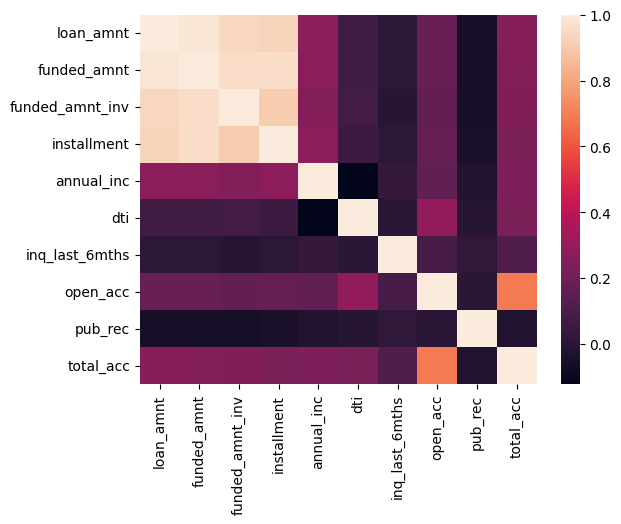

In [494]:
sns.heatmap(loanDf.corr())

Part 6: As per observation funded_amnt field is highly correlated to loan amount, funded amnt inv and installment, hence dropping that column

In [495]:
loanDf = loanDf.drop(columns=["funded_amnt"])

In [496]:
loanDf.isna().sum()

loan_amnt                 0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
sub_grade                 0
emp_length             1075
home_ownership            0
annual_inc                0
verification_status       0
issue_d                   0
loan_status               0
purpose                   0
dti                       0
inq_last_6mths            0
open_acc                  0
pub_rec                   0
revol_util               50
total_acc                 0
last_pymnt_d             71
dtype: int64

Part 7: Removing the the null valued rows in the below columns.
1. emp_length             
2. revol_util      
3. last_pymnt_d                      

In [497]:
loanDf.dropna(subset=["emp_length","revol_util","last_pymnt_d"],inplace=True)

In [498]:
# inq_last_6mths column is not needed as it represents number of inquiries done in last 6 months
loanDf.dropna(subset=["inq_last_6mths"],inplace=True)

### Final shape and size of dataset

In [499]:
loanDf.isna().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
purpose                0
dti                    0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_util             0
total_acc              0
last_pymnt_d           0
dtype: int64

In [500]:
loanDf.shape

(38533, 21)

## Data Analysis

In [501]:
# Load data types for dataframe
loanDf.dtypes

loan_amnt                int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
purpose                 object
dti                    float64
inq_last_6mths           int64
open_acc                 int64
pub_rec                  int64
revol_util              object
total_acc                int64
last_pymnt_d            object
dtype: object

In [502]:
# Identify numerical cols and categorical cols
numerical_cols = ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc','dti','revol_util','open_acc','dti','pub_rec','total_acc']
categorical_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','issue_d','loan_status','purpose','last_pymnt_d']

Analyze content of categorical columns and clean if needed

In [503]:
for col in categorical_cols[:6]:
    print("=================",col,"=================")
    print(loanDf[col].unique())

================= term =================
[' 36 months' ' 60 months']
================= grade =================
['B' 'C' 'A' 'E' 'F' 'D' 'G']
================= sub_grade =================
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'C2' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']
================= emp_length =================
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years']
================= home_ownership =================
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE']
================= verification_status =================
['Verified' 'Source Verified' 'Not Verified']


In [504]:
for col in categorical_cols[6:]:
    print("=================",col,"=================")
    print(loanDf[col].unique())

================= issue_d =================
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Jul-07' 'Jun-07']
================= loan_status =================
['Fully Paid' 'Charged Off' 'Current']
================= purpose =================
['credit_card' 'car' 'small_business' 'other' 'wedding'
 'debt_consolidation' 'home_improvement' 'major_purchase' 'medical'
 'moving' 'vacation' 'house' 'renewable_energy' 'educational']
================= last_pymnt_d =================
['Jan-15' 'Apr-13' 'Jun-14' 'May-16' 'Apr-12' 'Nov-12' 'Jun-13' 'Sep-13'
 'Jul-12' 'Oc

In [505]:
print(loanDf["term"].unique())
# Cleaning term column
loanDf["term"] = loanDf["term"].str.lstrip()
print(loanDf["term"].unique())

[' 36 months' ' 60 months']
['36 months' '60 months']


In [506]:
loanDf["emp_length"].unique()
# TODO: Create a new field for Analysis in Derived column

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years'],
      dtype=object)

In [507]:
loanDf["loan_status"].value_counts()

Fully Paid     32113
Charged Off     5322
Current         1098
Name: loan_status, dtype: int64

In [508]:
# Loan Status Column has 3 distict values out of them we need only Fully Paid and Charged Off. Removing rows for Current as they are not useful in understanding the trend
loanDf = loanDf[loanDf["loan_status"] != "Current"]
loanDf.shape

(37435, 21)

In [509]:
# Converting columne to datetime type
loanDf['issue_d'] = pd.to_datetime(loanDf.issue_d, format='%b-%y')

In [535]:
# Converting columne to datetime type
loanDf.last_pymnt_d = pd.to_datetime(loanDf.last_pymnt_d, format='%b-%y')

Analysing Numerical data fields

numerical_cols = ['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc','dti','revol_util','inq_last_6mths','open_acc','pub_rec','total_acc']

In [510]:
print(loanDf["total_acc"].unique())
print(loanDf["total_acc"].dtype)

[ 9  4 10 37 12 11 13  3 23 34 29 28 42 14 22 38 21 17  7 31 44 26 16  6
 18 27 25 40 35 24  8 20 15 19 36 51 32 30 33 46  5 61 56 50 41 79 62 43
 47 53 45 60 55 39 52 58 54 57 49 63 48 59 77 87 75 72 64 67 78 74 66 81
 90 80 71 69 73 70 68 65  2 76]
int64


In [511]:
# Remove percentage from int_rate column
print(loanDf["int_rate"].unique())
loanDf["int_rate"] = loanDf["int_rate"].str.replace("%","").astype(float)
print(loanDf["int_rate"].unique())

['10.65%' '15.27%' '15.96%' '13.49%' '7.90%' '18.64%' '21.28%' '12.69%'
 '14.65%' '9.91%' '16.29%' '6.03%' '11.71%' '12.42%' '16.77%' '7.51%'
 '8.90%' '18.25%' '6.62%' '19.91%' '17.27%' '14.27%' '17.58%' '21.67%'
 '19.42%' '20.89%' '20.30%' '23.91%' '19.03%' '23.13%' '22.74%' '22.35%'
 '22.06%' '24.11%' '6.00%' '23.52%' '22.11%' '7.49%' '11.99%' '5.99%'
 '10.99%' '9.99%' '18.79%' '11.49%' '15.99%' '16.49%' '6.99%' '12.99%'
 '15.23%' '14.79%' '5.42%' '8.49%' '10.59%' '17.49%' '15.62%' '19.29%'
 '13.99%' '18.39%' '16.89%' '17.99%' '20.99%' '22.85%' '19.69%' '20.62%'
 '20.25%' '21.36%' '23.22%' '21.74%' '22.48%' '23.59%' '12.62%' '18.07%'
 '11.63%' '7.91%' '7.42%' '11.14%' '20.20%' '12.12%' '19.39%' '16.11%'
 '17.54%' '22.64%' '16.59%' '17.19%' '12.87%' '20.69%' '9.67%' '21.82%'
 '19.79%' '18.49%' '13.84%' '22.94%' '24.40%' '21.48%' '14.82%' '7.29%'
 '17.88%' '20.11%' '16.02%' '13.43%' '14.91%' '13.06%' '15.28%' '15.65%'
 '17.14%' '11.11%' '10.37%' '14.17%' '16.40%' '17.51%' '7.66%' '10.7

In [512]:
# Remove percentage from int_rate column
print(loanDf["revol_util"].unique())
loanDf["revol_util"] = loanDf["revol_util"].str.replace("%","").astype(float)
print(loanDf["revol_util"].unique())

['83.70%' '9.40%' '98.50%' ... '49.63%' '0.04%' '7.28%']
[8.370e+01 9.400e+00 9.850e+01 ... 4.963e+01 4.000e-02 7.280e+00]


In [513]:
numerical_cols

['loan_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'revol_util',
 'open_acc',
 'dti',
 'pub_rec',
 'total_acc']

In [514]:
loanDf[numerical_cols].dtypes

loan_amnt            int64
funded_amnt_inv    float64
int_rate           float64
installment        float64
annual_inc         float64
dti                float64
revol_util         float64
open_acc             int64
dti                float64
pub_rec              int64
total_acc            int64
dtype: object

In [515]:
loanDf[numerical_cols].describe()

,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util,open_acc,dti,pub_rec,total_acc
count,37435.000000,37435.000000,37435.000000,37435.000000,3.743500e+04,37435.000000,37435.000000,37435.000000,37435.000000,37435.000000,37435.000000
mean,11130.898224,10293.419440,11.955527,324.939134,6.946938e+04,13.290142,48.861572,9.307279,13.290142,0.053640,22.107760
std,7352.434933,7033.755066,3.681918,208.853524,6.471225e+04,6.658644,28.341695,4.395122,6.658644,0.234488,11.412629
min,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,5500.000000,5000.000000,8.940000,167.550000,4.100000e+04,8.170000,25.400000,6.000000,8.170000,0.000000,14.000000
50%,10000.000000,8875.000000,11.830000,280.610000,6.000000e+04,13.390000,49.300000,9.000000,13.390000,0.000000,20.000000
75%,15000.000000,14110.318050,14.420000,429.450000,8.300000e+04,18.550000,72.400000,12.000000,18.550000,0.000000,29.000000
max,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,99.900000,44.000000,29.990000,4.000000,90.000000


In [516]:
loanDf[numerical_cols].describe()

,loan_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,revol_util,open_acc,dti,pub_rec,total_acc
count,37435.000000,37435.000000,37435.000000,37435.000000,3.743500e+04,37435.000000,37435.000000,37435.000000,37435.000000,37435.000000,37435.000000
mean,11130.898224,10293.419440,11.955527,324.939134,6.946938e+04,13.290142,48.861572,9.307279,13.290142,0.053640,22.107760
std,7352.434933,7033.755066,3.681918,208.853524,6.471225e+04,6.658644,28.341695,4.395122,6.658644,0.234488,11.412629
min,500.000000,0.000000,5.420000,15.690000,4.000000e+03,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000
25%,5500.000000,5000.000000,8.940000,167.550000,4.100000e+04,8.170000,25.400000,6.000000,8.170000,0.000000,14.000000
50%,10000.000000,8875.000000,11.830000,280.610000,6.000000e+04,13.390000,49.300000,9.000000,13.390000,0.000000,20.000000
75%,15000.000000,14110.318050,14.420000,429.450000,8.300000e+04,18.550000,72.400000,12.000000,18.550000,0.000000,29.000000
max,35000.000000,35000.000000,24.400000,1305.190000,6.000000e+06,29.990000,99.900000,44.000000,29.990000,4.000000,90.000000


### Check for outliers in numerical cols

In [517]:
def plot_distribution_box(dataDF,col,title):
    #Increasing the figure size of plot
    plt.figure(figsize=(12,4))
    #Setting subplot index
    plt.subplot(1,2,1)
    #Histogram plot
    sns.distplot(a=dataDF[col], rug=True)
    plt.subplot(1,2,2)
    #Box plot
    dataDF[col].plot.box()
    #Single title for both subplots.
    plt.suptitle(title)
    plt.show()

In [518]:
def percentile_dist(dataDF,col):
    return dataDF[col].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

C:\Users\asthaagarwal\AppData\Local\Temp\ipykernel_47576\3158418102.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=dataDF[col], rug=True)


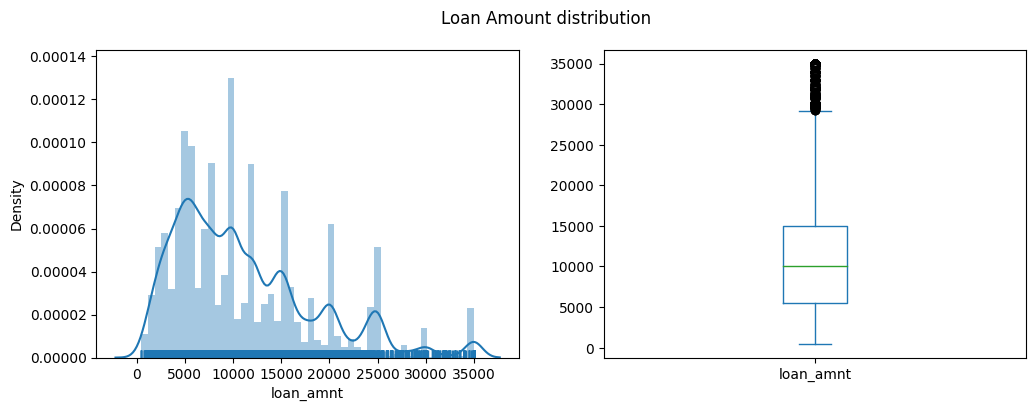

count    37435.000000
mean     11130.898224
std       7352.434933
min        500.000000
5%        2400.000000
10%       3200.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
90%      21850.000000
95%      25000.000000
99%      35000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


In [519]:
plot_distribution_box(loanDf,"loan_amnt",'Loan Amount distribution')
print(percentile_dist(loanDf,"loan_amnt"))

Observation: Most people have taken loan of around 10K as median and mean both are around same value. Maximum people have taken a loan of less than 25K as it is the 95th percentile of data distribution, after that only few people have taken loan in range of 25K to 35K

C:\Users\asthaagarwal\AppData\Local\Temp\ipykernel_47576\3158418102.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=dataDF[col], rug=True)


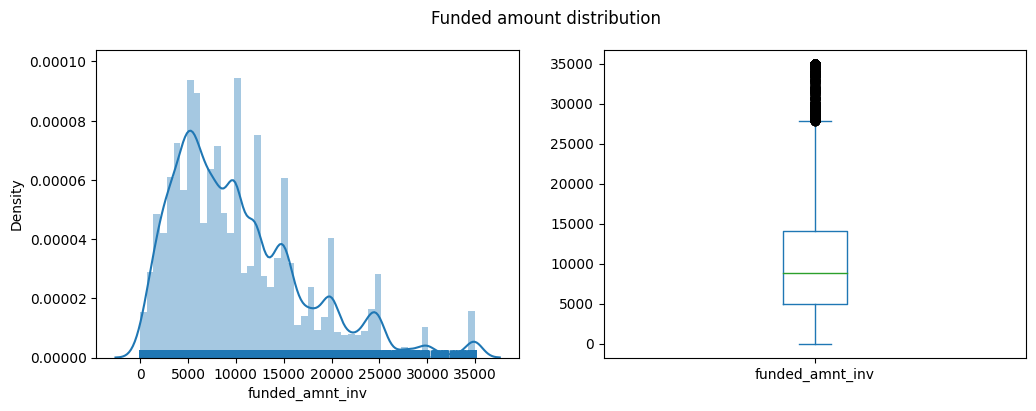

count    37435.000000
mean     10293.419440
std       7033.755066
min          0.000000
5%        1860.825000
10%       2950.000000
25%       5000.000000
50%       8875.000000
75%      14110.318050
90%      20000.000000
95%      24550.996525
99%      34725.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64


In [520]:
# Approved loan
plot_distribution_box(loanDf,"funded_amnt_inv",'Funded amount distribution')
print(percentile_dist(loanDf,"funded_amnt_inv"))

Observation: Most people have taken loan of around 10K as median and mean both are around same value. Maximum people have taken a loan of less than 25K as it is the 95th percentile of data distribution, after that only few people have taken loan in range of 25K to 35K

Trend of data is same as loan requested amount

C:\Users\asthaagarwal\AppData\Local\Temp\ipykernel_47576\3158418102.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=dataDF[col], rug=True)


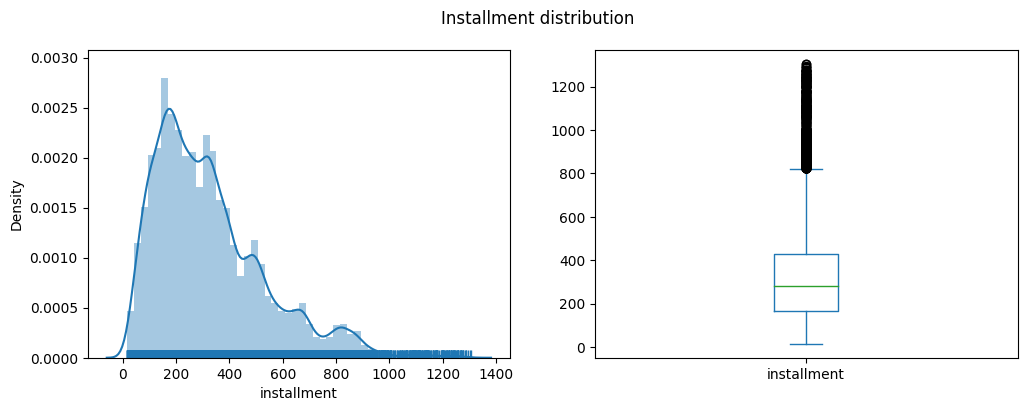

count    37435.000000
mean       324.939134
std        208.853524
min         15.690000
5%          73.140000
10%        100.388000
25%        167.550000
50%        280.610000
75%        429.450000
90%        623.348000
95%        764.697000
99%        932.170000
max       1305.190000
Name: installment, dtype: float64


In [521]:
plot_distribution_box(loanDf,"installment",'Installment distribution')
print(percentile_dist(loanDf,"installment"))

C:\Users\asthaagarwal\AppData\Local\Temp\ipykernel_47576\3158418102.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=dataDF[col], rug=True)


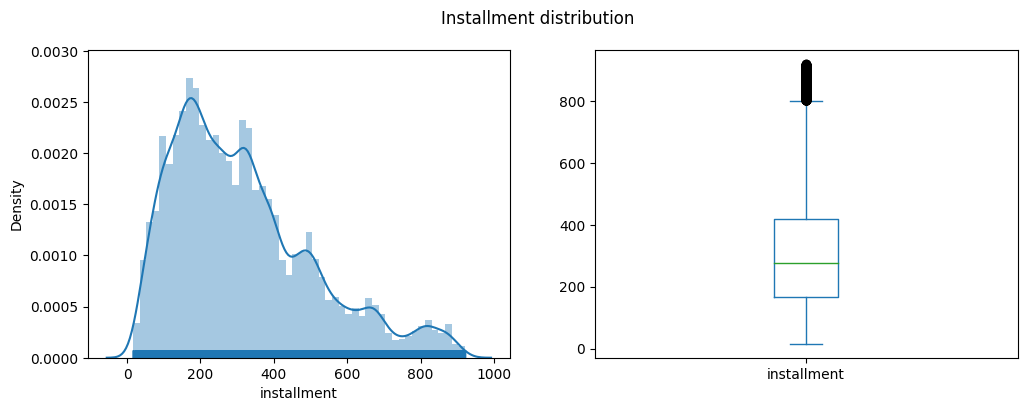

count    37015.000000
mean       316.656666
std        194.586867
min         15.690000
5%          72.752000
10%         99.954000
25%        166.630000
50%        277.960000
75%        420.445000
90%        602.400000
95%        710.110000
99%        869.024200
max        920.850000
Name: installment, dtype: float64


In [522]:
plot_distribution_box(loanDf[loanDf["installment"]<=921],"installment",'Installment distribution')
print(percentile_dist(loanDf[loanDf["installment"]<=921],"installment"))

Observation: Installment distribution is static after 921 of value, 99 percentile is at 921 and for 1 percentile people installment is more than that. As per analysis , this is for people who applied for a loan of more than 25000. We can drop the outliers for installment

C:\Users\asthaagarwal\AppData\Local\Temp\ipykernel_47576\3158418102.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=dataDF[col], rug=True)


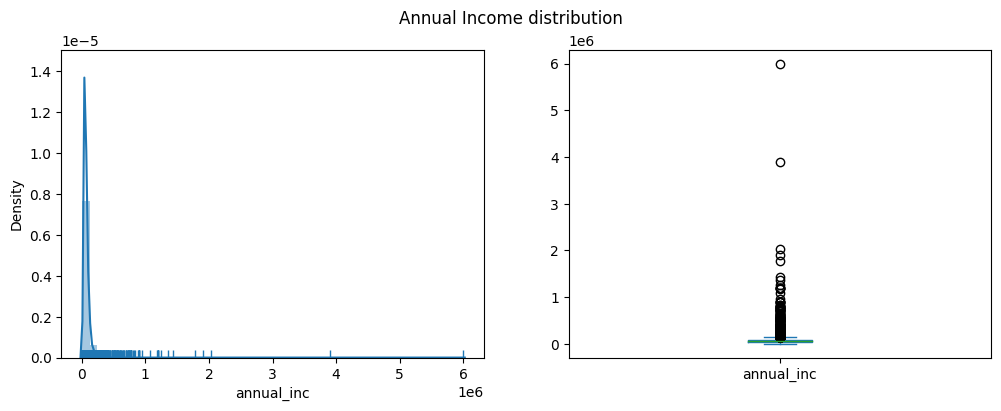

count    3.743500e+04
mean     6.946938e+04
std      6.471225e+04
min      4.000000e+03
5%       2.400000e+04
10%      3.000000e+04
25%      4.100000e+04
50%      6.000000e+04
75%      8.300000e+04
90%      1.170000e+05
95%      1.420000e+05
99%      2.350000e+05
max      6.000000e+06
Name: annual_inc, dtype: float64

In [523]:
plot_distribution_box(loanDf,"annual_inc",'Annual Income distribution')
loanDf["annual_inc"].describe(percentiles=[0.05,0.1,0.25,0.5,0.75,0.9,0.95,0.99])

Observation: There are a lot of outliers in annual income field, 99 percentile customers have annual income below 235K and rest are outliers and we can skip from data

In [524]:
# Number of records to be deleted
len(loanDf[loanDf["annual_inc"] > 235000])

370

C:\Users\asthaagarwal\AppData\Local\Temp\ipykernel_47576\3158418102.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=dataDF[col], rug=True)


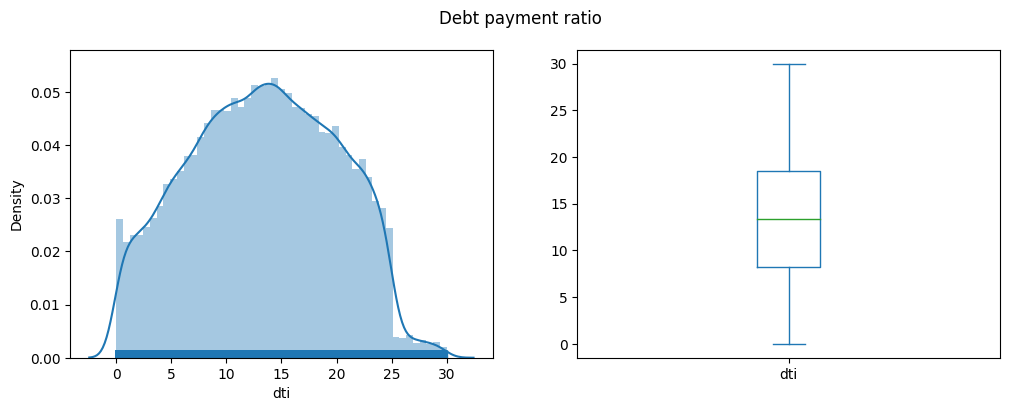

In [525]:
plot_distribution_box(loanDf,"dti",'Debt payment ratio')

Observation: Distribution seems even across the data, and no outliers are observed

C:\Users\asthaagarwal\AppData\Local\Temp\ipykernel_47576\3158418102.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=dataDF[col], rug=True)


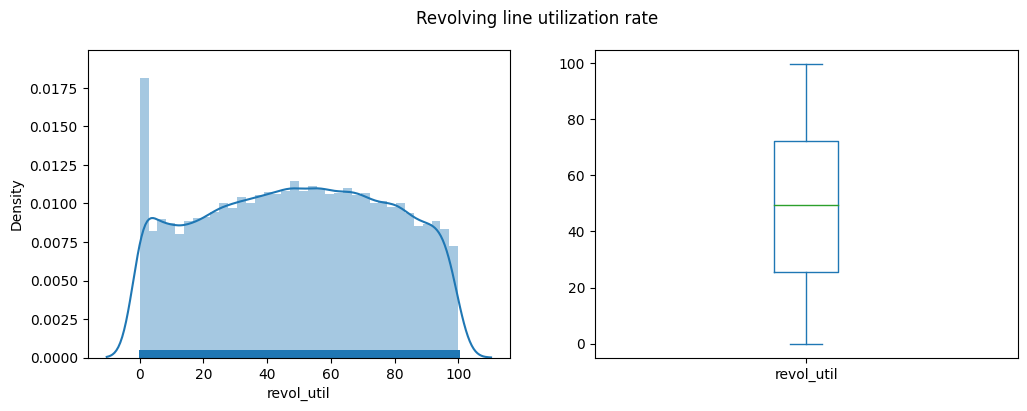

In [526]:
plot_distribution_box(loanDf,"revol_util",'Revolving line utilization rate')

Observation: Distribution seems even across the data, and no outliers are observed, there is a spike at 0

C:\Users\asthaagarwal\AppData\Local\Temp\ipykernel_47576\3158418102.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=dataDF[col], rug=True)


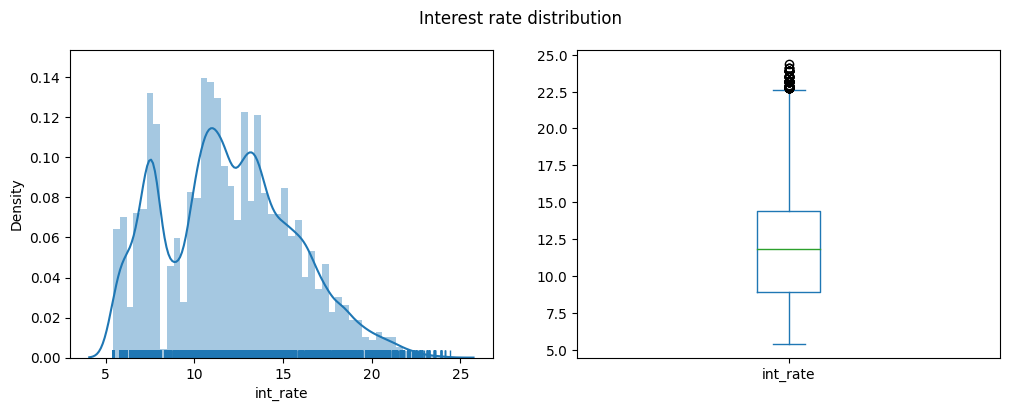

count    37435.000000
mean        11.955527
std          3.681918
min          5.420000
5%           6.170000
10%          7.140000
25%          8.940000
50%         11.830000
75%         14.420000
90%         16.820000
95%         18.390000
99%         20.990000
max         24.400000
Name: int_rate, dtype: float64


In [527]:
# Approved loan
plot_distribution_box(loanDf,"int_rate",'Interest rate distribution')
print(percentile_dist(loanDf,"int_rate"))

In [528]:
# Remove outliers on the basis of installment field
loanDf = loanDf[loanDf["installment"]<=921]
loanDf.shape

(37015, 21)

In [529]:
# Remove outliers on the basis of annual income field
loanDf = loanDf[loanDf["annual_inc"] <= 235000]
loanDf.shape

(36689, 21)

## Derived Columns

In [532]:
# Create date reated columns for loan issue date
loanDf["issue_month"] = loanDf.issue_d.dt.month
loanDf["issue_year"] = loanDf.issue_d.dt.year

In [536]:
# Create date reated columns for loan issue date
loanDf["last_pymnt_d_month"] = loanDf.last_pymnt_d.dt.month
loanDf["last_pymnt_d_year"] = loanDf.last_pymnt_d.dt.year

In [538]:
loanDf["approved_loan_ratio"] = loanDf["funded_amnt_inv"]/loanDf["loan_amnt"]

C:\Users\asthaagarwal\AppData\Local\Temp\ipykernel_47576\3158418102.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=dataDF[col], rug=True)


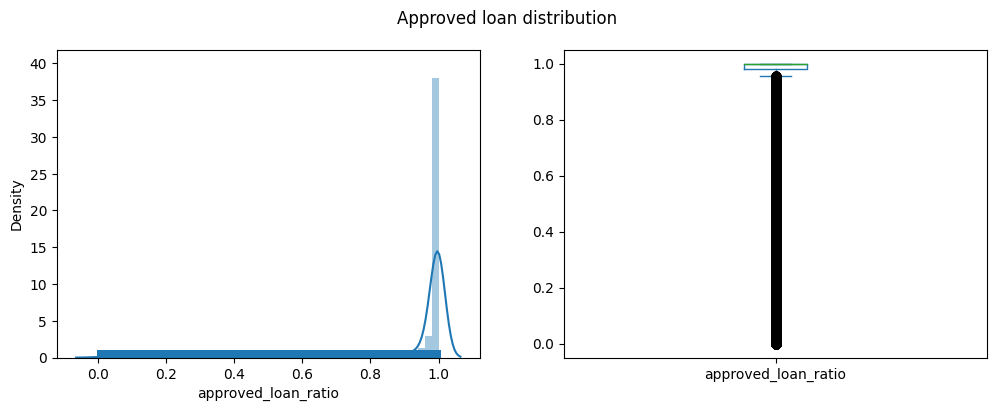

count    36689.000000
mean         0.936475
std          0.175503
min          0.000000
5%           0.578720
10%          0.799155
25%          0.981923
50%          0.999167
75%          1.000000
90%          1.000000
95%          1.000000
99%          1.000000
max          1.000000
Name: approved_loan_ratio, dtype: float64


In [540]:
# Approved loan
plot_distribution_box(loanDf,"approved_loan_ratio",'Approved loan distribution')
print(percentile_dist(loanDf,"approved_loan_ratio"))

Observation: Loan Amount upto 98% of requested amount is approved for most of the people as the 25th percentile is at 98 percent

## Univariate Analysis (Categorical columns)

### Note: Univariate analysis for numerical columns is covered with outlier identification in above steps

In [ ]:
###